# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini berkaitan dengan Garis Kemiskinan di Indonesia, yang mencakup informasi tentang tingkat kemiskinan di berbagai provinsi berdasarkan berbagai faktor seperti jenis konsumsi (makanan & non-makanan), daerah (perkotaan & perdesaan), dan periode waktu.

1. **Sumber Dataset**:
- Dataset ini dapat diakses di Kaggle dengan nama **Dataset Kesejahteraan Pekerja Indonesia**.
- Data ini memuat data **Garis Kemiskinan per Kapita**, dengan pemisahan berdasarkan provinsi, tahun, periode survei, jenis pengeluaran, dan daerah tempat tinggal.
2. **Ketentuan Dataset**:
- Mengelompokkan provinsi di Indonesia berdasarkan pola garis kemiskinan mereka.
- Menentukan apakah ada provinsi dengan karakteristik kemiskinan yang mirip untuk membantu analisis sosial dan ekonomi.
- Mengidentifikasi pola perbedaan kemiskinan antara perkotaan dan perdesaan.

# **2. Import Library**

Pada tahap ini, kita akan mengimpor pustaka Python yang diperlukan untuk analisis data dan pembangunan model clustering.

In [1]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah cluster optimal
from sklearn.cluster import KMeans  # Algoritma clustering
from sklearn.metrics import silhouette_score  # Untuk evaluasi clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Untuk preprocessing
from sklearn.decomposition import PCA # Untuk visualisasi hasil clustering
import seaborn as sns  # Untuk visualisasi data

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam notebook, untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar dan memastikan bahwa data sudah berhasil diimpor serta sesuai untuk analisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv('Dataset_inisiasi.csv')

# Menampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
display(df.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nCek Missing Values:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
display(df.describe())

5 Baris Pertama Dataset:


,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Statistik Deskriptif:


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#  Mengecek struktur dataset
print("Ukuran Dataset:", df.shape)
print("\nInformasi Dataset:")
print(df.info())

Ukuran Dataset: (5460, 6)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None


In [4]:
# Mengecek jumlah missing values lagi
print("\nCek Missing Values:")
print(df.isnull().sum())

# Mengisi missing values pada `gk` dengan median
df = df.assign(gk=df['gk'].fillna(df['gk'].median()))

# Mengecek ulang apakah masih ada missing values
print("\nMissing Values Setelah Imputasi:")
print(df.isnull().sum())



Cek Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

Missing Values Setelah Imputasi:
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


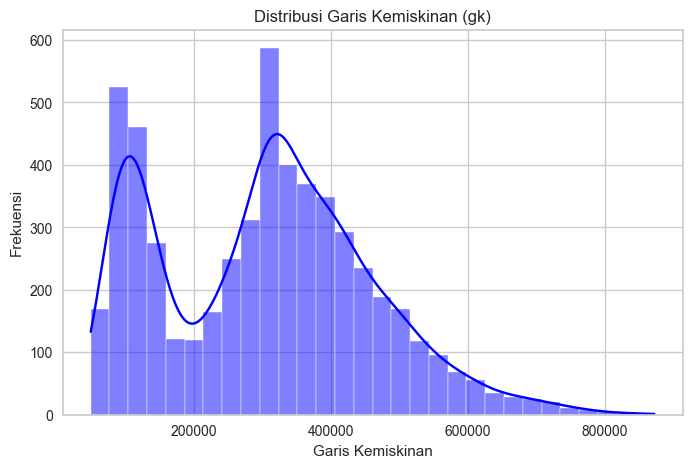

In [5]:
# Histogram distribusi `gk`
plt.figure(figsize=(8,5))
sns.histplot(df['gk'], bins=30, kde=True, color='blue')
plt.title("Distribusi Garis Kemiskinan (gk)")
plt.xlabel("Garis Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()

In [6]:
# Cek berapa banyak provinsi yang memiliki garis kemiskinan di bawah 200.000
low_gk_count = df[df['gk'] <= 200000].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan <= 200.000: {low_gk_count}")

# Cek berapa banyak provinsi yang memiliki garis kemiskinan di rentang 200.000 – 400.000
mid_gk_count = df[df['gk'].between(200000, 400000)].shape[0]
print(f"Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: {mid_gk_count}")

Jumlah provinsi dengan garis kemiskinan <= 200.000: 1603
Jumlah provinsi dengan garis kemiskinan antara 200.000 – 400.000: 2416


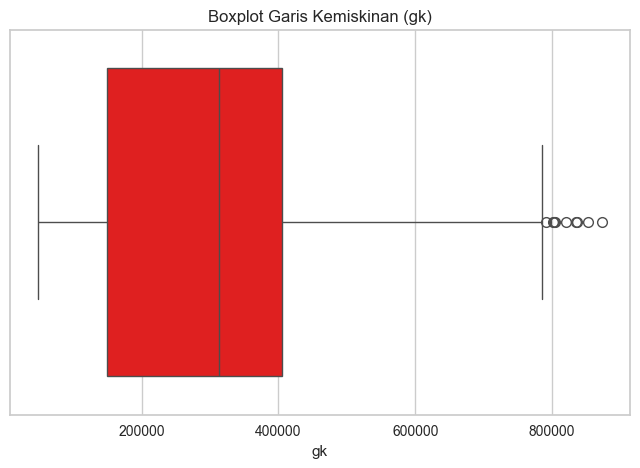

In [7]:
# Boxplot untuk mendeteksi outlier pada `gk`
plt.figure(figsize=(8,5))
sns.boxplot(x=df['gk'], color='red')
plt.title("Boxplot Garis Kemiskinan (gk)")
plt.show()

In [8]:
# Cek provinsi mana saja yang memiliki gk > 600.000.
outliers = df[df['gk'] > 600000]
display(outliers[['provinsi', 'gk']])

,provinsi,gk
146,ACEH,606394.0
147,ACEH,646232.0
151,ACEH,602900.0
155,ACEH,617293.0
303,SUMATERA UTARA,615227.0
...,...,...
5298,PAPUA,608205.0
5299,PAPUA,646116.0
5301,PAPUA,600795.0
5302,PAPUA,629175.0


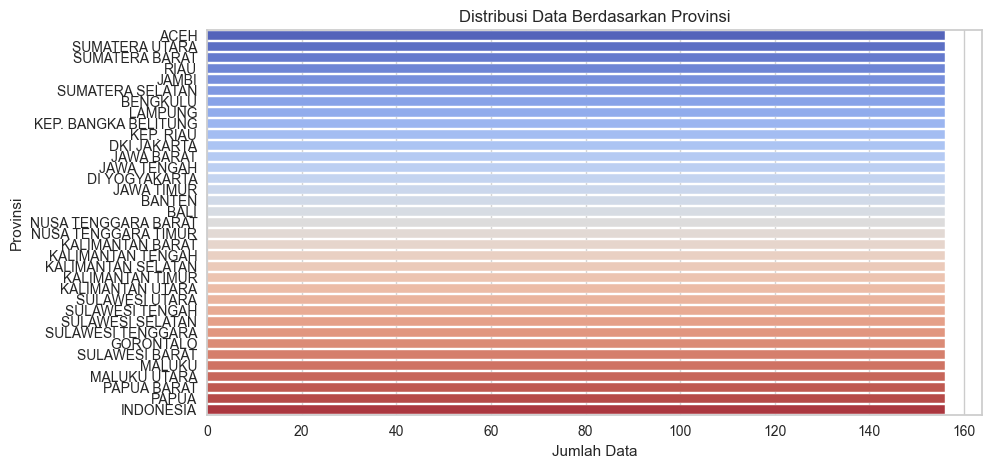

In [9]:
# Visualisasi distribusi provinsi
plt.figure(figsize=(10,5))
sns.countplot(y=df['provinsi'], hue=df['provinsi'], order=df['provinsi'].value_counts().index, palette='coolwarm', legend=False)
plt.title("Distribusi Data Berdasarkan Provinsi")
plt.xlabel("Jumlah Data")
plt.ylabel("Provinsi")
plt.show()

In [10]:
# Cek apakah provinsi "INDONESIA" ada
print("Cek apakah provinsi INDONESIA ada")
print(df['provinsi'].unique())

# Akan dihapus di data preprocessing

Cek apakah provinsi INDONESIA ada
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']


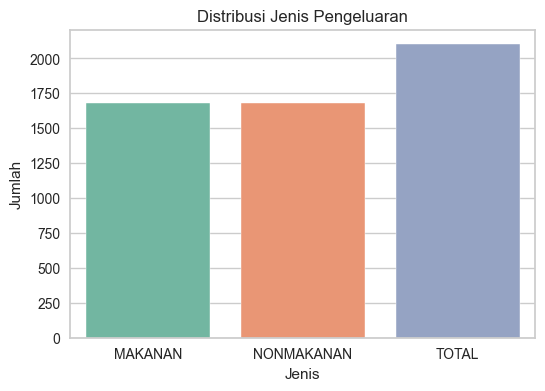

In [11]:
# Visualisasi distribusi jenis pengeluaran
plt.figure(figsize=(6,4))
sns.countplot(x=df['jenis'], hue=df['jenis'], palette='Set2', legend=False)
plt.title("Distribusi Jenis Pengeluaran")
plt.xlabel("Jenis")
plt.ylabel("Jumlah")
plt.show()

In [12]:
# Total semua kategori jenis pengeluaran
print(df['jenis'].value_counts())

jenis
TOTAL         2100
MAKANAN       1680
NONMAKANAN    1680
Name: count, dtype: int64


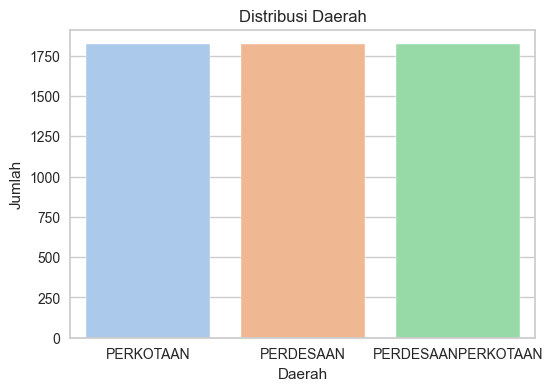

In [13]:
# Visualisasi distribusi daerah (perkotaan/perdesaan)
plt.figure(figsize=(6,4))
sns.countplot(x=df['daerah'], hue=df['daerah'], palette='pastel', legend=False)
plt.title("Distribusi Daerah")
plt.xlabel("Daerah")
plt.ylabel("Jumlah")
plt.show()

In [14]:
# Total semua kategori daerah
print(df['daerah'].value_counts())

daerah
PERKOTAAN             1820
PERDESAAN             1820
PERDESAANPERKOTAAN    1820
Name: count, dtype: int64


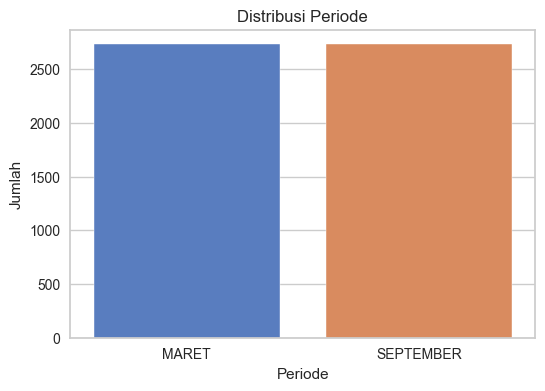

In [15]:
# Visualisasi distribusi periode (Maret/September)
plt.figure(figsize=(6,4))
sns.countplot(x=df['periode'], hue=df['periode'], palette='muted', legend=False)
plt.title("Distribusi Periode")
plt.xlabel("Periode")
plt.ylabel("Jumlah")
plt.show()

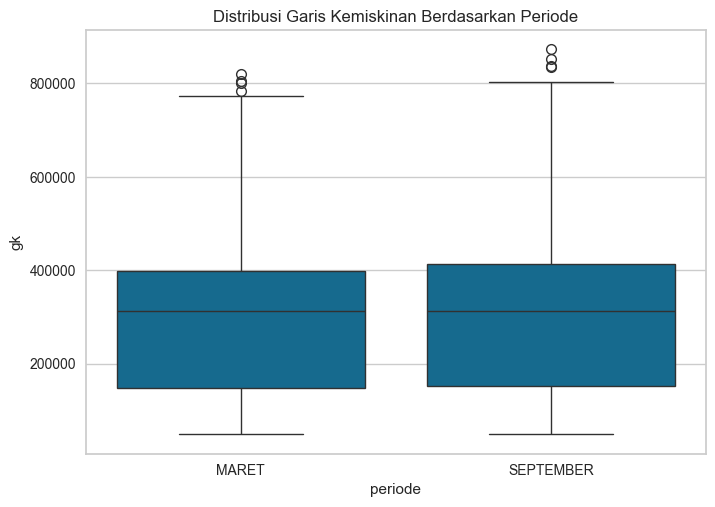

In [16]:
# Cek perubahan signifikan dalam garis kemiskinan (gk) antara kedua periode
sns.boxplot(x=df['periode'], y=df['gk'])
plt.title("Distribusi Garis Kemiskinan Berdasarkan Periode")
plt.show()

In [17]:
# Total semua kategori periode
print(df['periode'].value_counts())

# Cek apakah hanya ada dua kategori valid: "MARET" dan "SEPTEMBER"
print(df['periode'].unique())

periode
MARET        2730
SEPTEMBER    2730
Name: count, dtype: int64
['MARET' 'SEPTEMBER']


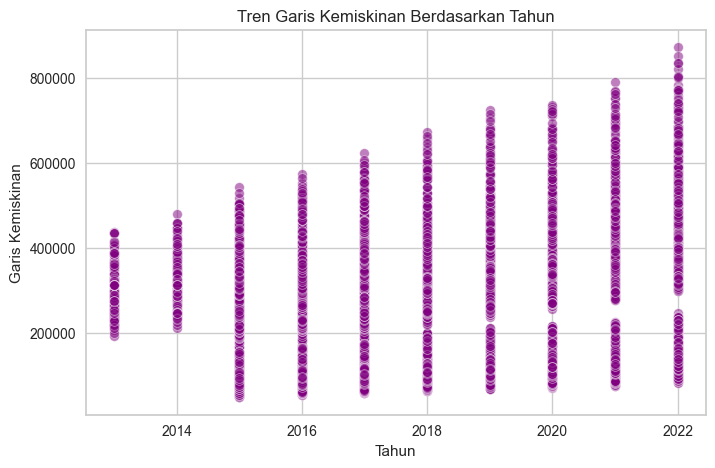

In [18]:
# Scatter plot untuk melihat hubungan antara `tahun` dan `gk`
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['tahun'], y=df['gk'], alpha=0.5, color='purple')
plt.title("Tren Garis Kemiskinan Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

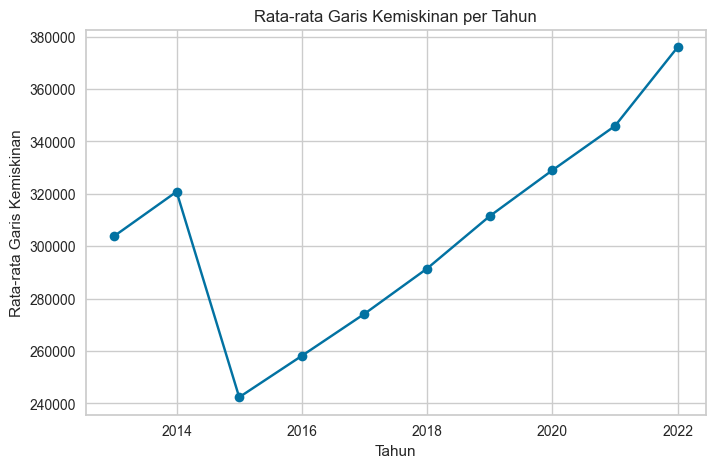

In [19]:
# Cek Tren Pertumbuhan Garis Kemiskinan dari Tahun ke Tahun
df.groupby('tahun')['gk'].mean().plot(kind='line', marker='o', figsize=(8,5))
plt.title("Rata-rata Garis Kemiskinan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Garis Kemiskinan")
plt.grid(True)
plt.show()

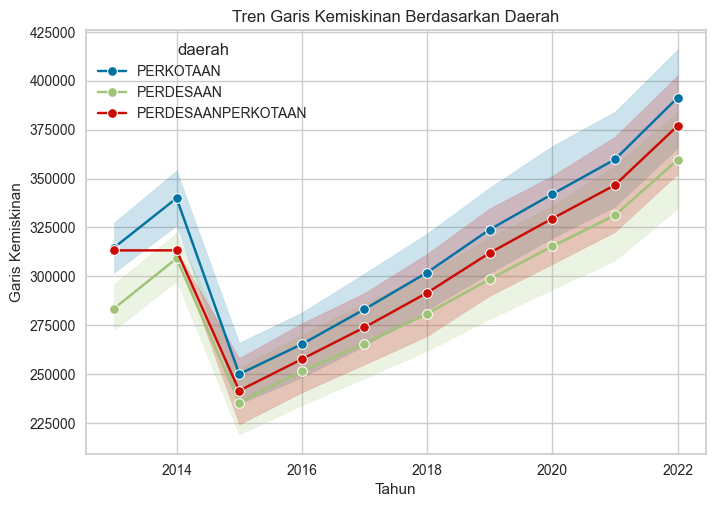

In [20]:
# Membandingkan Tren antara Perkotaan dan Perdesaan
sns.lineplot(x='tahun', y='gk', hue='daerah', data=df, marker='o')
plt.title("Tren Garis Kemiskinan Berdasarkan Daerah")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan")
plt.show()

In [21]:
# Cek tahun dengan kenaikan terbesar dan provinsi mana yang terdampak
df.groupby(['tahun', 'provinsi'])['gk'].mean().reset_index().sort_values(by=['tahun', 'gk'], ascending=False).head(10)

,tahun,provinsi,gk
332,2022,KEP. BANGKA BELITUNG,552162.611111
331,2022,KALIMANTAN UTARA,520573.222222
330,2022,KALIMANTAN TIMUR,497527.777778
333,2022,KEP. RIAU,465784.888889
340,2022,PAPUA BARAT,459970.055556
320,2022,DKI JAKARTA,440503.555556
339,2022,PAPUA,439224.944444
335,2022,MALUKU,435018.222222
347,2022,SUMATERA BARAT,421525.888889
341,2022,RIAU,421092.333333


In [22]:
# Filter data hanya untuk tahun 2015
df_2015 = df[df['tahun'] == 2015]

# Melihat provinsi dengan garis kemiskinan tertinggi tahun 2015
df_2015.groupby('provinsi')['gk'].mean().reset_index().sort_values(by='gk', ascending=False).head(10)

,provinsi,gk
17,KEP. BANGKA BELITUNG,339473.000000
5,DKI JAKARTA,324526.166667
16,KALIMANTAN UTARA,322136.944444
15,KALIMANTAN TIMUR,320885.222222
18,KEP. RIAU,305186.444444
25,PAPUA BARAT,303340.888889
24,PAPUA,274967.944444
26,RIAU,272376.111111
20,MALUKU,268318.333333
0,ACEH,266577.333333


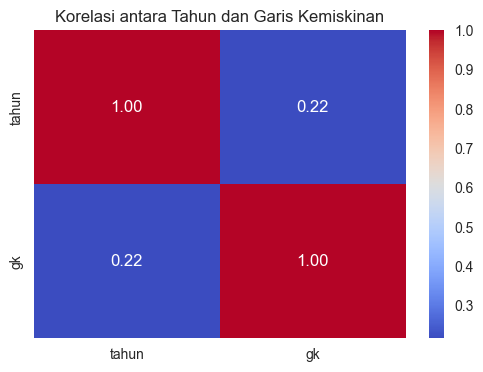

In [23]:
# Heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Tahun dan Garis Kemiskinan")
plt.show()

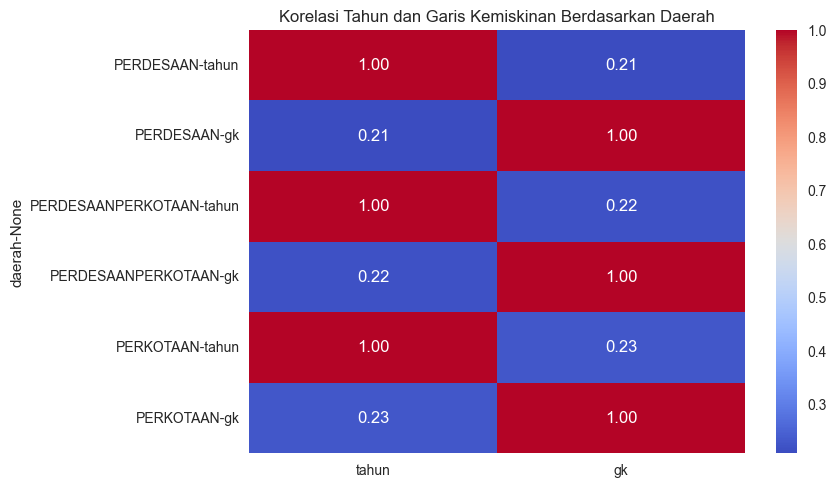

In [24]:
# Heatmap korelasi berdasarkan Daerah dan Provinsi
sns.heatmap(df.groupby('daerah')[['tahun', 'gk']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Tahun dan Garis Kemiskinan Berdasarkan Daerah")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [25]:
# Cek jumlah data duplikat sebelum penghapusan
print(f"Jumlah data duplikat sebelum dihapus: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()

# Cek ulang jumlah data duplikat setelah penghapusan
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


In [26]:
# Cek apakah "INDONESIA" ada
print("Sebelum penghapusan:")
print(df['provinsi'].unique())

# Menghapus baris dengan provinsi "INDONESIA"
df = df[df['provinsi'] != 'INDONESIA']

# Cek apakah "INDONESIA" masih ada setelah dihapus
print("\nSetelah penghapusan:")
print(df['provinsi'].unique())  # Menampilkan daftar provinsi unik setelah dihapus

Sebelum penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']

Setelah penghapusan:
['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWES

In [27]:
# Hitung Q1 (25%) dan Q3 (75%)
Q1 = df['gk'].quantile(0.25)
Q3 = df['gk'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)

# Cek jumlah outlier
outliers = df[(df['gk'] < batas_bawah) | (df['gk'] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")

Jumlah Outlier: 9


In [28]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom `gk`
df['gk'] = scaler.fit_transform(df[['gk']])

# Cek hasil normalisasi
df[['gk']].head()

,gk
0,0.297393
1,0.307622
2,0.312614
3,0.329022
4,0.301982


In [29]:
# Inisialisasi LabelEncoder
label_enc_provinsi = LabelEncoder()
label_enc_jenis = LabelEncoder()
label_enc_daerah = LabelEncoder()
label_enc_periode = LabelEncoder()

# Melakukan encoding untuk masing-masing kolom
df['provinsi'] = label_enc_provinsi.fit_transform(df['provinsi'])
df['jenis'] = label_enc_jenis.fit_transform(df['jenis'])
df['daerah'] = label_enc_daerah.fit_transform(df['daerah'])
df['periode'] = label_enc_periode.fit_transform(df['periode'])

# Menampilkan hasil encoding
print(df.head())

   provinsi  jenis  daerah  tahun  periode        gk
0         0      0       2   2015        0  0.297393
1         0      0       2   2015        1  0.307622
2         0      0       2   2016        0  0.312614
3         0      0       2   2016        1  0.329022
4         0      0       0   2015        0  0.301982


In [30]:
# Menambahkan kategori berdasarkan garis kemiskinan (gk)
bins = [0, 0.200000, 0.400000, 0.600000, df['gk'].max()]
labels = ['Sangat Rendah', 'Rendah', 'Menengah', 'Tinggi']
df['gk_category'] = pd.cut(df['gk'], bins=bins, labels=labels)

# Cek distribusi kategori berdasarkan gk
print("Distribusi kategori berdasarkan garis kemiskinan:")
print(df['gk_category'].value_counts())

# Melakukan encoded
label_enc_gk_category = LabelEncoder()
df['gk_category'] = label_enc_gk_category.fit_transform(df['gk_category'])

Distribusi kategori berdasarkan garis kemiskinan:
gk_category
Rendah           2009
Sangat Rendah    1621
Menengah         1316
Tinggi            357
Name: count, dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [31]:
# Menentukan jumlah cluster awal
kmeans = KMeans(n_clusters=4, random_state=42)

# Melatih model dengan data yang telah diproses menggunakan data encoded
features = ['provinsi', 'jenis', 'daerah', 'periode', 'tahun', 'gk', 'gk_category']
X = df[features]

# Fit model ke data
kmeans.fit(X)

# Tambahkan hasil clustering ke dalam dataframe
df['cluster'] = kmeans.labels_

# Cek hasil clustering
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,gk_category,cluster
0,0,0,2,2015,0,0.297393,1,2
1,0,0,2,2015,1,0.307622,1,2
2,0,0,2,2016,0,0.312614,1,2
3,0,0,2,2016,1,0.329022,1,2
4,0,0,0,2015,0,0.301982,1,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

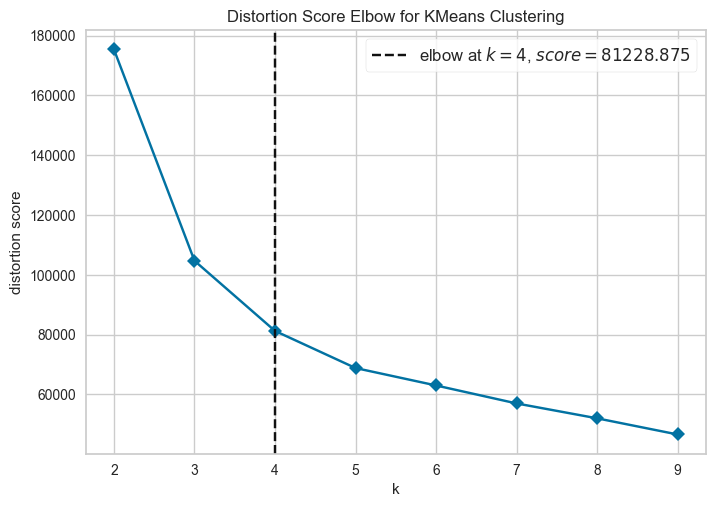

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Inisialisasi model K-Means
model = KMeans(random_state=42)

# Menggunakan KElbowVisualizer untuk menemukan jumlah cluster optimal
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(X)  # Latih model
visualizer.show()

In [33]:
# Hitung silhouette score untuk model KMeans
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 4 cluster: 0.3790


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakabagn kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

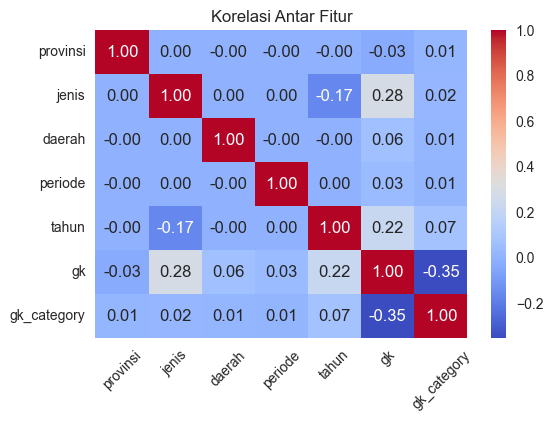

In [34]:
# Cek korelasi antar fitur
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Menghapus fitur yang memiliki korelasi sangat rendah dengan 'gk'
X_selected = df[['gk', 'gk_category']]  # Memilih fitur yang relevan

# Inisialisasi model KMeans dengan jumlah cluster yang optimal
kmeans_selected = KMeans(n_clusters=4, random_state=42)
kmeans_selected.fit(X_selected)

# Mendapatkan label cluster
labels_selected = kmeans_selected.labels_

# Evaluasi menggunakan Silhouette Score
sil_score_selected = silhouette_score(X_selected, labels_selected)
print(f"Silhouette Score setelah fitur terpilih: {sil_score_selected:.4f}")

Silhouette Score setelah fitur terpilih: 0.9428


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

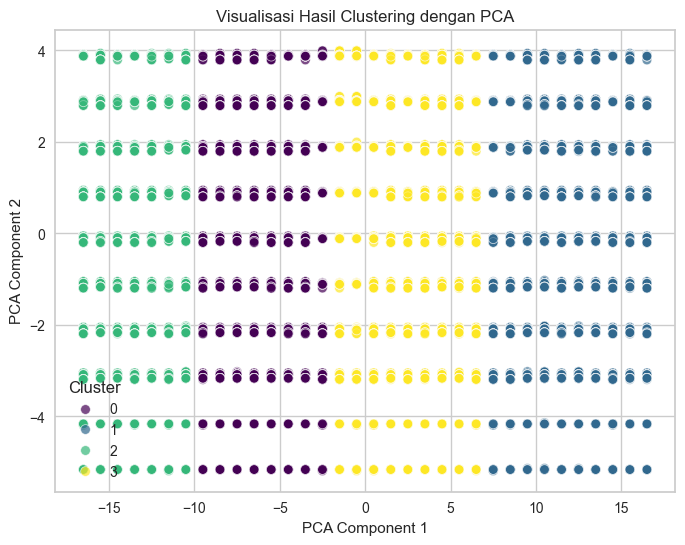

In [36]:
# Reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Masukkan hasil PCA ke DataFrame
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**


### **Interpretasi Target**

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [37]:
# Tambahkan label cluster ke dalam df
df['cluster'] = kmeans_selected.labels_

# Inverse transform kolom kategorikal
df['provinsi'] = label_enc_provinsi.inverse_transform(df['provinsi'])
df['jenis'] = label_enc_jenis.inverse_transform(df['jenis'])
df['daerah'] = label_enc_daerah.inverse_transform(df['daerah'])
df['periode'] = label_enc_periode.inverse_transform(df['periode'])
df['gk_category'] = label_enc_gk_category.inverse_transform(df['gk_category'])

print(df[['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk', 'gk_category']].head())

  provinsi    jenis     daerah  tahun    periode        gk gk_category
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  0.297393      Rendah
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  0.307622      Rendah
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  0.312614      Rendah
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  0.329022      Rendah
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  0.301982      Rendah


### **Interpretasi Target**

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [38]:
# Mengembalikan data Normalisasi kolom `gk`
df['gk'] = scaler.inverse_transform(df[['gk']])

# Cek hasil normalisasi
df[['gk']].head()

,gk
0,293697.0
1,302128.0
2,306243.0
3,319768.0
4,297479.0


In [39]:
# Menghapus fitur yang tidak diperlukan
# Hapus kolom PCA
df = df.drop(columns=['pca1', 'pca2'])

print(df.head())

  provinsi    jenis     daerah  tahun    periode        gk gk_category  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0      Rendah   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0      Rendah   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0      Rendah   
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0      Rendah   
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0      Rendah   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


### Melakukan Analisis Karakteristik

Berikut adalah proses untuk menganalisis dan menginterpretasi hasil clustering berdasarkan data yang sudah dikelompokkan menggunakan KMeans. Kami akan melihat karakteristik tiap cluster berdasarkan fitur yang tersedia, dengan melihat rata-rata nilai dari beberapa fitur (seperti **gk, tahun, provinsi, jenis, dan daerah**) dalam setiap cluster.

In [40]:
# Analisis statistik deskriptif untuk fitur numerik di setiap cluster
cluster_stats = df.groupby('cluster')[['gk', 'tahun']].agg(['mean', 'min', 'max', 'median'])

# Analisis distribusi kategori di setiap cluster
category_stats = df.groupby('cluster')[['provinsi', 'jenis', 'daerah', 'periode', 'gk_category']].agg(lambda x: x.mode()[0])

# Gabungkan hasil statistik deskriptif dan distribusi kategori
cluster_analysis = pd.concat([cluster_stats, category_stats], axis=1)

# Tampilkan hasil analisis
print(cluster_analysis)

            (gk, mean)  (gk, min)  (gk, max)  (gk, median)  (tahun, mean)  \
cluster                                                                     
0        307833.079144   213479.0   378248.0      313294.0    2016.935789   
1        117835.700185    49612.0   213278.0      110736.0    2018.348550   
2        444537.394377   378311.0   543085.0      437003.0    2019.003040   
3        622309.846369    48561.0   872843.0      603863.5    2020.416201   

         (tahun, min)  (tahun, max)  (tahun, median)              provinsi  \
cluster                                                                      
0                2013          2022           2017.0        SULAWESI BARAT   
1                2013          2022           2018.0      SULAWESI SELATAN   
2                2013          2022           2019.0           PAPUA BARAT   
3                2015          2022           2021.0  KEP. BANGKA BELITUNG   

              jenis     daerah    periode    gk_category  
cluster  

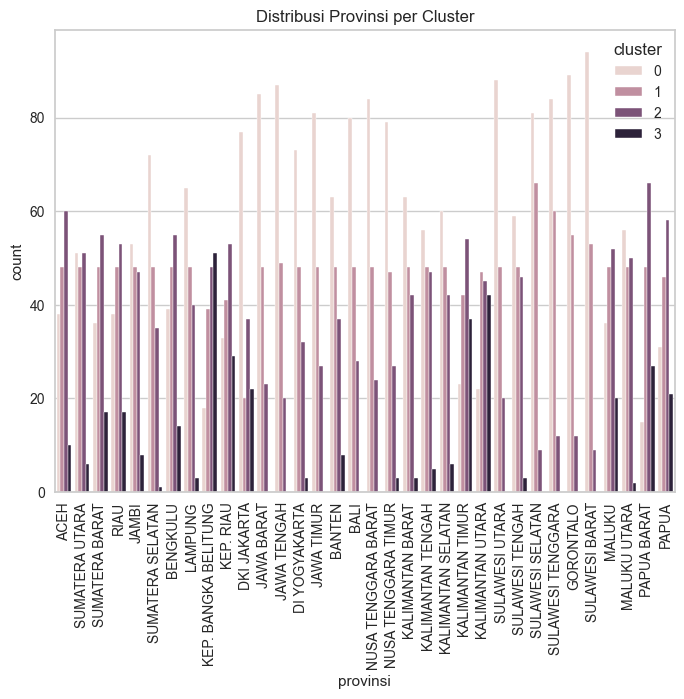

In [41]:
# Barplot untuk distribusi provinsi per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='provinsi', hue='cluster', data=df)
plt.title('Distribusi Provinsi per Cluster')
plt.xticks(rotation=90)
plt.show()

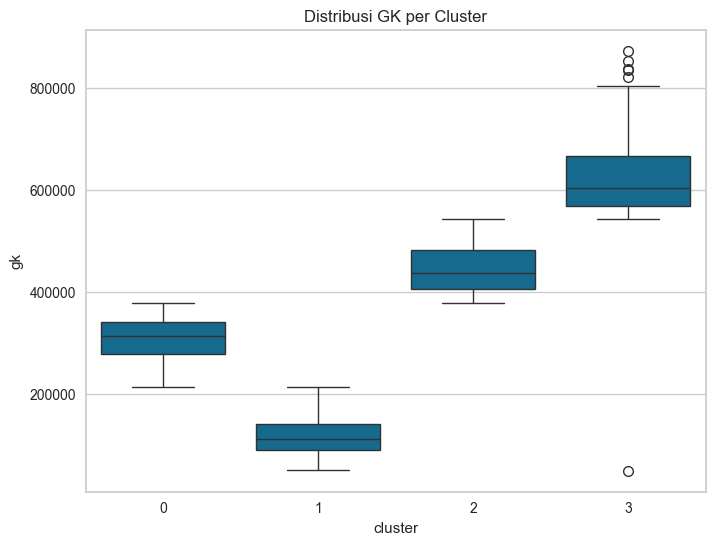

In [42]:
# Boxplot untuk gk berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='gk', data=df)
plt.title('Distribusi GK per Cluster')
plt.show()

### **Analisis Karakteristik Cluster dari Model KMeans**

#### Cluster 0:
- **Rata-rata Garis Kemiskinan (gk)**: 307,833
- **Tahun**: Rata-rata 2016.93 (Rentang: 2013 - 2022)
- **Provinsi**: SULAWESI BARAT
- **Jenis Pengeluaran**: MAKANAN
- **Daerah**: PERDESAAN
- **Periode**: MARET
- **gk_category**: Rendah

##### **Interpretasi**:
Cluster ini terdiri dari daerah dengan **tingkat kemiskinan yang menengah** (gk sekitar 307,833), dengan **pengeluaran dominan untuk makanan**. Meskipun berada di daerah **perdesaan**, cluster ini menunjukkan bahwa **pengeluaran untuk makanan menjadi faktor dominan**. Strategi bisnis di sini bisa difokuskan pada **pemasaran produk makanan dengan harga moderat** di wilayah yang masih berkembang namun dengan daya beli yang tidak terlalu tinggi. Meskipun pengeluaran rendah, pasar ini tetap menunjukkan potensi jika didorong dengan pemasaran yang tepat.

---

#### Cluster 1:
- **Rata-rata Garis Kemiskinan (gk)**: 117,836
- **Tahun**: Rata-rata 2018.35 (Rentang: 2013 - 2022)
- **Provinsi**: SULAWESI SELATAN
- **Jenis Pengeluaran**: NONMAKANAN
- **Daerah**: PERKOTAAN
- **Periode**: MARET
- **gk_category**: Sangat Rendah

##### **Interpretasi**:
Cluster ini memiliki **tingkat kemiskinan rendah** (gk sekitar 117,836), dengan **pengeluaran lebih banyak untuk non-makanan**, dan mayoritas berasal dari daerah **perkotaaan**. Hal ini menunjukkan bahwa daerah ini lebih mampu untuk mengalokasikan sebagian besar pengeluarannya untuk barang-barang non-makanan seperti barang tahan lama atau barang-barang lain yang mendukung kehidupan sehari-hari. Bisnis yang berfokus pada **produk non-makanan** seperti barang-barang rumah tangga, pakaian, atau teknologi bisa menjadi peluang di pasar ini, dengan harga yang lebih bersaing namun tetap terjangkau.

---

#### Cluster 2:
- **Rata-rata Garis Kemiskinan (gk)**: 444,537
- **Tahun**: Rata-rata 2019.00 (Rentang: 2013 - 2022)
- **Provinsi**: PAPUA BARAT
- **Jenis Pengeluaran**: TOTAL (non-makanan lebih dominan)
- **Daerah**: PERKOTAAN
- **Periode**: SEPTEMBER
- **gk_category**: Menengah

##### **Interpretasi**:
Cluster ini terdiri dari daerah dengan **tingkat kemiskinan menengah** (gk sekitar 444,537), dengan **pengeluaran lebih dominan untuk non-makanan**. Mayoritas berada di daerah **perkotaaan**. Hal ini menunjukkan bahwa meskipun tingkat kemiskinan masih relatif tinggi, masyarakat di sini lebih mengalokasikan pengeluarannya untuk kebutuhan non-makanan, seperti barang-barang rumah tangga, transportasi, atau barang tahan lama. **Peluang bisnis** ada pada penyediaan barang-barang yang tahan lama atau produk **berkualitas dengan harga terjangkau** yang dapat memenuhi kebutuhan jangka panjang di wilayah ini.

---

#### Cluster 3:
- **Rata-rata Garis Kemiskinan (gk)**: 622,310
- **Tahun**: Rata-rata 2020.42 (Rentang: 2015 - 2022)
- **Provinsi**: KEP. BANGKA BELITUNG
- **Jenis Pengeluaran**: TOTAL (non-makanan lebih dominan)
- **Daerah**: PERDESAAN
- **Periode**: SEPTEMBER
- **gk_category**: Tinggi

##### **Interpretasi**:
Cluster ini menunjukkan **tingkat kemiskinan sangat tinggi** (gk sekitar 622,310) dengan **pengeluaran dominan untuk non-makanan**. Mayoritas cluster ini berasal dari daerah **perdesaan**. Walaupun tingkat kemiskinan sangat tinggi, pengeluaran mereka lebih banyak untuk **barang atau layanan yang tidak terkait langsung dengan makanan**, seperti barang-barang tahan lama atau layanan lainnya. Bisnis yang berfokus pada produk **berkualitas tinggi namun terjangkau**, serta barang-barang non-makanan yang mendukung kebutuhan hidup lainnya, bisa memperoleh tempat yang baik di pasar ini.

---

#### Pola yang Dapat Dimanfaatkan:

##### 1. Pengeluaran untuk Makanan vs Non-Makanan:
- Cluster dengan pengeluaran **lebih banyak untuk makanan** cenderung berasal dari daerah **perkotaaan dengan tingkat kemiskinan lebih rendah**.
- Sementara cluster dengan pengeluaran lebih banyak untuk **non-makanan** cenderung berasal dari **perdesaan**, meskipun dengan tingkat kemiskinan yang lebih tinggi.

##### **Strategi bisnis**:
- Untuk daerah dengan pengeluaran lebih banyak untuk makanan, perusahaan bisa berfokus pada penawaran **produk pangan** dengan kualitas baik namun harga yang terjangkau.
- Untuk daerah dengan pengeluaran lebih banyak untuk barang non-makanan, bisnis bisa menawarkan **barang-barang yang lebih tahan lama**, seperti peralatan rumah tangga, kendaraan, atau produk lainnya yang memenuhi kebutuhan jangka panjang.

##### 2. Perkotaan vs Perdesaan:
- Daerah **perkotaaan** sering kali memiliki **tingkat kemiskinan lebih rendah** dan lebih banyak menghabiskan uang untuk kebutuhan dasar seperti makanan.
- Daerah **perdesaan** lebih sering mengalokasikan uang mereka untuk barang-barang non-makanan, meskipun mereka memiliki tingkat kemiskinan yang lebih tinggi.

##### **Strategi bisnis**:
- Di **perkotaaan**, kamu bisa memfokuskan pemasaran pada produk yang lebih langsung memenuhi **kebutuhan sehari-hari**, seperti **makanan** dan barang-barang rumah tangga.
- Di **perdesaan**, bisnis bisa menawarkan **produk non-makanan** dengan harga lebih terjangkau yang mendukung keberlanjutan hidup masyarakat setempat.

##### 3. Tahun dan Tren Kemiskinan:
- Tahun yang lebih **baru** (seperti di Cluster 2 dan Cluster 3) menunjukkan **fluktuasi pengeluaran** yang lebih tinggi dan **pergeseran pola ekonomi** yang mungkin dipengaruhi oleh kondisi sosial dan ekonomi yang berubah.

##### **Strategi bisnis**:
- Bisnis bisa lebih mengoptimalkan **pemasaran musiman**, dengan menyesuaikan produk yang ditawarkan berdasarkan bulan dan tahun yang paling aktif, seperti periode **Maret** dan **September**, yang terlihat cukup konsisten dalam dataset.

---

#### Kesimpulan:
Hasil clustering memberikan **insight yang sangat berguna** tentang karakteristik pasar berdasarkan pengeluaran, lokasi, dan tingkat kemiskinan. Berdasarkan temuan ini, bisnis bisa mengoptimalkan **strategi pemasaran** dan **penentuan produk** berdasarkan pola pengeluaran untuk **makanan vs non-makanan**, serta **lokasi geografis (perkotaaan vs perdesaan)** dan **tren waktu**.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
# Mengekspor DataFrame df_original ke file CSV
df.to_csv('Dataset_clustering.csv', index=False)

print("Data telah berhasil diekspor.csv'")

Data telah berhasil diekspor.csv'
